In [1]:
import numpy as np
from sklearn import linear_model
import pandas as pd
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
def validate_lasso(p,train,validate,test):
    features = train.columns
    train_x = train[features[:-1]]
    train_y = train[features[-1]]
    validate_x = validate[features[:-1]]
    validate_y = validate[features[-1]]
    test_x = test[features[:-1]]
    test_y = test[features[-1]]
    
    opt_v = 100000
    opt_alpha = 0
    
    for i in p: 
        
        reg = linear_model.Lasso(alpha=i/10.)
        reg.fit(train_x,train_y)
        mse_tr = score(train_x,train_y,reg)
        mse_v = score(validate_x,validate_y, reg)
        mse_t = score(test_x,test_y,reg)
        if(mse_v < opt_v): 
            opt_t = mse_t
            opt_v = mse_v
            opt_tr = mse_tr
            opt_alpha = i/10.
    
    return opt_alpha,opt_tr,opt_v,opt_t
        
         
    

In [3]:
def score(test_x,test_y,lm):
    prediction = lm.predict(test_x)
    error = mean_squared_error(prediction,test_y)
    return error**0.5

In [4]:
def divide_data(dataset):
    attr = dataset.columns
    train = []
    test = []
    for index,row in dataset.iterrows():
        if(index%3==0):
            test.append(row)
        else: 
            train.append(row)
    return pd.DataFrame(train),pd.DataFrame(test)

In [5]:
def validate_data(p,train,validate,test):
    features = train.columns
    train_x = train[features[:-1]]
    train_y = train[features[-1]]
    validate_x = validate[features[:-1]]
    validate_y = validate[features[-1]]
    test_x = test[features[:-1]]
    test_y = test[features[-1]]
    
    opt_v = 100000
    opt_alpha = 0
    
    for i in p: 
        
        reg = linear_model.Ridge(alpha=i/10.)
        reg.fit(train_x,train_y)
        mse_tr = score(train_x,train_y,reg)
        mse_v = score(validate_x,validate_y, reg)
        mse_t = score(test_x,test_y,reg)
        if(mse_v < opt_v): 
            opt_t = mse_t
            opt_v = mse_v
            opt_tr = mse_tr
            opt_alpha = i/10.
    
    return opt_alpha,opt_tr,opt_v,opt_t
        
         
    

In [6]:
#Q4 Fitting a Ridge regression model on the data.
reg = linear_model.Ridge(alpha = 0.5)
X = np.array([[1,2],[2,4],[3,6],[4,8]])
Y = np.array([2,3,4,5])
reg.fit(X,Y)
lamb = 0.1

#Finding the coefficient using normal regresssion.
A = np.linalg.inv(np.dot(X.T,X)+lamb*np.identity(len(X[0])))
B = np.dot(X.T,Y)
theta_opt = np.dot(A,B)
print("Yes the coefficients found are",theta_opt)

Yes the coefficients found are [0.26648901 0.53297801]


In [7]:

#Q5(a) 5 fold cross validation using Ridge regression: 


real_estate = pd.read_excel('real_estate.xlsx')
features = real_estate.columns
p = range(1,100)

normalized = pd.DataFrame(columns = features)
for f in features:
    normalized[f] = real_estate[f]/max(real_estate[f])
    
normalized = normalized.sample(frac=1)
    
test = normalized[300:]
train_and_validate = normalized[:300]



train = train_and_validate[60:]
validate = train_and_validate[:60]
alpha,train_error,validate_error,test_error = validate_data(p,train,validate,test)
print("Fold 1: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

train_1 = train_and_validate[:60]
train_2 = train_and_validate[120:]
validate = train_and_validate[60:120]
train = pd.concat([train_1,train_2])
alpha,train_error,validate_error,test_error = validate_data(p,train,validate,test)
print("Fold 2: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

train_1 = train_and_validate[:120]
train_2 = train_and_validate[180:]
validate = train_and_validate[120:180]
train = pd.concat([train_1,train_2])
alpha,train_error,validate_error,test_error = validate_data(p,train,validate,test)
print("Fold 3: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

train_1 = train_and_validate[:180]
train_2 = train_and_validate[240:]
train = pd.concat([train_1,train_2])
validate = train_and_validate[180:240]
alpha,train_error,validate_error,test_error = validate_data(p,train,validate,test)
print("Fold 4: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

train = train_and_validate[:240]
validate = train_and_validate[240:]
alpha,train_error,validate_error,test_error = validate_data(p,train,validate,test)
print("Fold 5: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

Fold 1: alpha =  0.1  train_error  0.0676928836621582 validation_error  0.0660899656599208 test_error  0.10152721536571993
Fold 2: alpha =  1.7  train_error  0.0696383677880782 validation_error  0.060275317637527207 test_error  0.1021334171464435
Fold 3: alpha =  0.1  train_error  0.06638078586626248 validation_error  0.07131652998986684 test_error  0.10145761853180667
Fold 4: alpha =  1.6  train_error  0.06770996751489597 validation_error  0.06827701090725136 test_error  0.10204749159713106
Fold 5: alpha =  0.1  train_error  0.0659749978243862 validation_error  0.07316146427506093 test_error  0.10187277803907024


In [8]:
#Q5(b)5 fold cross validation using Lasso regression: 


real_estate = pd.read_excel('real_estate.xlsx')
features = real_estate.columns
p = range(1,100)
normalized = pd.DataFrame(columns = features)
for f in features:
    normalized[f] = real_estate[f]/len(real_estate)
    
normalized = normalized.sample(frac=1)
    
test = normalized[300:]
train_and_validate = normalized[:300]



train = train_and_validate[60:]
validate = train_and_validate[:60]
alpha,train_error,validate_error,test_error = validate_lasso(p,train,validate,test)
print("Fold 1: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

train_1 = train_and_validate[:60]
train_2 = train_and_validate[120:]
validate = train_and_validate[60:120]
train = pd.concat([train_1,train_2])
alpha,train_error,validate_error,test_error = validate_lasso(p,train,validate,test)
print("Fold 2: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

train_1 = train_and_validate[:120]
train_2 = train_and_validate[180:]
validate = train_and_validate[120:180]
train = pd.concat([train_1,train_2])
alpha,train_error,validate_error,test_error = validate_lasso(p,train,validate,test)
print("Fold 3: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

train_1 = train_and_validate[:180]
train_2 = train_and_validate[240:]
train = pd.concat([train_1,train_2])
validate = train_and_validate[180:240]
alpha,train_error,validate_error,test_error = validate_lasso(p,train,validate,test)
print("Fold 4: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

train = train_and_validate[:240]
validate = train_and_validate[240:]
alpha,train_error,validate_error,test_error = validate_lasso(p,train,validate,test)
print("Fold 5: alpha = ",alpha," train_error ", train_error, "validation_error ", validate_error,"test_error ",test_error)

Fold 1: alpha =  0.1  train_error  0.03498453217105051 validation_error  0.02954584721067199 test_error  0.029617757213672716
Fold 2: alpha =  0.1  train_error  0.03393094715468191 validation_error  0.034072556307523406 test_error  0.02964278557796495
Fold 3: alpha =  0.1  train_error  0.03403799156377832 validation_error  0.03404568618604319 test_error  0.029939318047756548
Fold 4: alpha =  0.1  train_error  0.034676199750236086 validation_error  0.030921202811650148 test_error  0.029686151246493053
Fold 5: alpha =  0.1  train_error  0.03194993581526682 validation_error  0.041149944843121115 test_error  0.02959109236770415


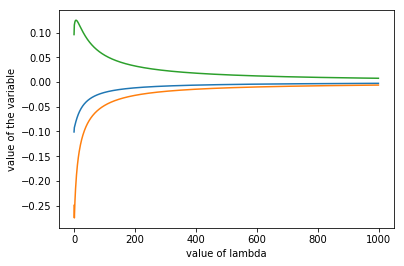

In [9]:
#Q5(c)Regularization path for ridge regression

features = real_estate.columns
plot_features = ['X1 transaction date', 'X2 house age','X3 distance to the nearest MRT station','X4 number of convenience stores']
real_estate = pd.read_excel('real_estate.xlsx')

normalized = pd.DataFrame(columns = features)
for f in features:
    normalized[f] = real_estate[f]/max(real_estate[f])
    
p = range(1000)
coef_list  = [[],[],[]]
for i in p:
    normalized_x = normalized[features[:-1]]
    normalized_y = normalized[features[-1]]
    reg = linear_model.Ridge(alpha = i)
    reg.fit(normalized_x,normalized_y)
    for i in range(2,5): 
        coef_list[i-2].append(reg.coef_[i])


for i in range(0,3): 
    plt.plot(p,coef_list[i])
    
plt.xlabel('value of lambda')
plt.ylabel('value of the variable')
plt.show()


c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:17: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


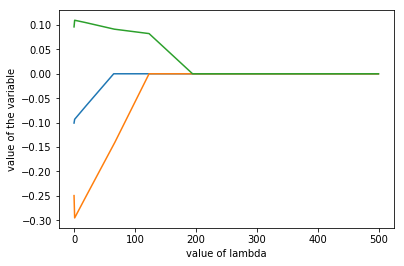

In [10]:
#Q5(c) Regularization path for Lasso regression 


features = real_estate.columns
real_estate = pd.read_excel('real_estate.xlsx')

normalized = pd.DataFrame(columns = features)
for f in features:
    normalized[f] = real_estate[f]/max(real_estate[f])
    
p = range(500)
coef_list  = [[],[],[]]
for i in p:
    normalized_x = normalized[features[:-1]]
    normalized_y = normalized[features[-1]]
    reg = linear_model.Lasso(alpha = i/10000.,max_iter = 1000)
    reg.fit(normalized_x,normalized_y)
    for i in range(2,5): 
        coef_list[i-2].append(reg.coef_[i])


for i in range(0,3): 
    plt.plot(p,coef_list[i])
    
plt.xlabel('value of lambda')
plt.ylabel('value of the variable')
plt.show()


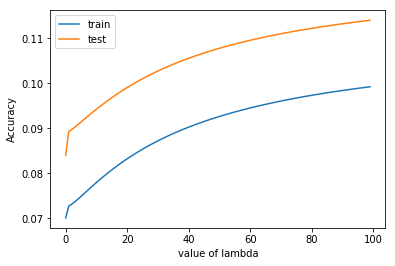

In [11]:
#Q5(d)Plotting the Accuracy v/s the value of lambda for Ridge Regression
real_estate = pd.read_excel('real_estate.xlsx')

real_estate = real_estate.sample(frac=1)

features = real_estate.columns

normalized = pd.DataFrame(columns = features)
for f in features:
    normalized[f] = real_estate[f]/max(real_estate[f])



train,test = divide_data(normalized)

features = train.columns[1:]

train_x = train[features[:-1]]
train_y = train[features[-1]]
test_x = test[features[:-1]]
test_y = test[features[-1]]
p = range(100)
acc_train = []
acc_test = []
for i in p:
    lm = linear_model.Ridge(alpha = i)
    lm.fit(train_x,train_y)
    accuracy_test = score(test_x,test_y,lm)
    accuracy_train = score(train_x,train_y,lm)
    acc_test.append(accuracy_test) 
    acc_train.append(accuracy_train)

plt.plot(p,acc_train)
plt.plot(p,acc_test)

plt.legend(['train','test'], loc='upper left')
plt.ylabel('Accuracy')
plt.xlabel('value of lambda')
plt.show()

c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:25: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:478: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
c:\users\abhinav\appdata\local\programs\python\python36\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


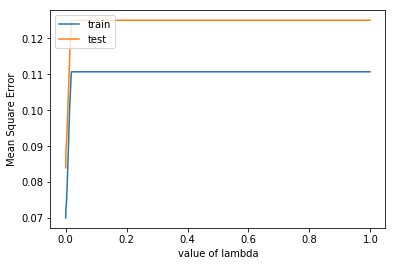

In [12]:
#Q5(d) Plotting the Accuracy v/s the value of lambda for Lasso regression 

real_estate = pd.read_excel('real_estate.xlsx')
real_estate = real_estate.sample(frac=1)

features = real_estate.columns

normalized = pd.DataFrame(columns = features)
for f in features:
    normalized[f] = real_estate[f]/max(real_estate[f])


features = train.columns[1:]
train,test = divide_data(normalized)
train_x = train[features[:-1]]
train_y = train[features[-1]]
test_x = test[features[:-1]]
test_y = test[features[-1]]
p = range(1000)
p = [i/1000 for i in p]
acc_train = []
acc_test = []
for i in p:
    lm = linear_model.Lasso(alpha = i)
    lm.fit(train_x,train_y)
    accuracy_test = score(test_x,test_y,lm)
    accuracy_train = score(train_x,train_y,lm)
    acc_test.append(accuracy_test) 
    acc_train.append(accuracy_train)

plt.plot(p,acc_train)
plt.plot(p,acc_test)

plt.legend(['train','test'], loc='upper left')
plt.ylabel('Mean Square Error')
plt.xlabel('value of lambda')
plt.show()